# Harmonic Oscillator

In this tutorial, we will explore a classical physics problem known as the damped harmonic oscillator. The harmonic oscillator is a system that experiences a restoring force proportional to its displacement from equilibrium. When damping is introduced, the system loses energy over time due to factors such as friction or air resistance. 


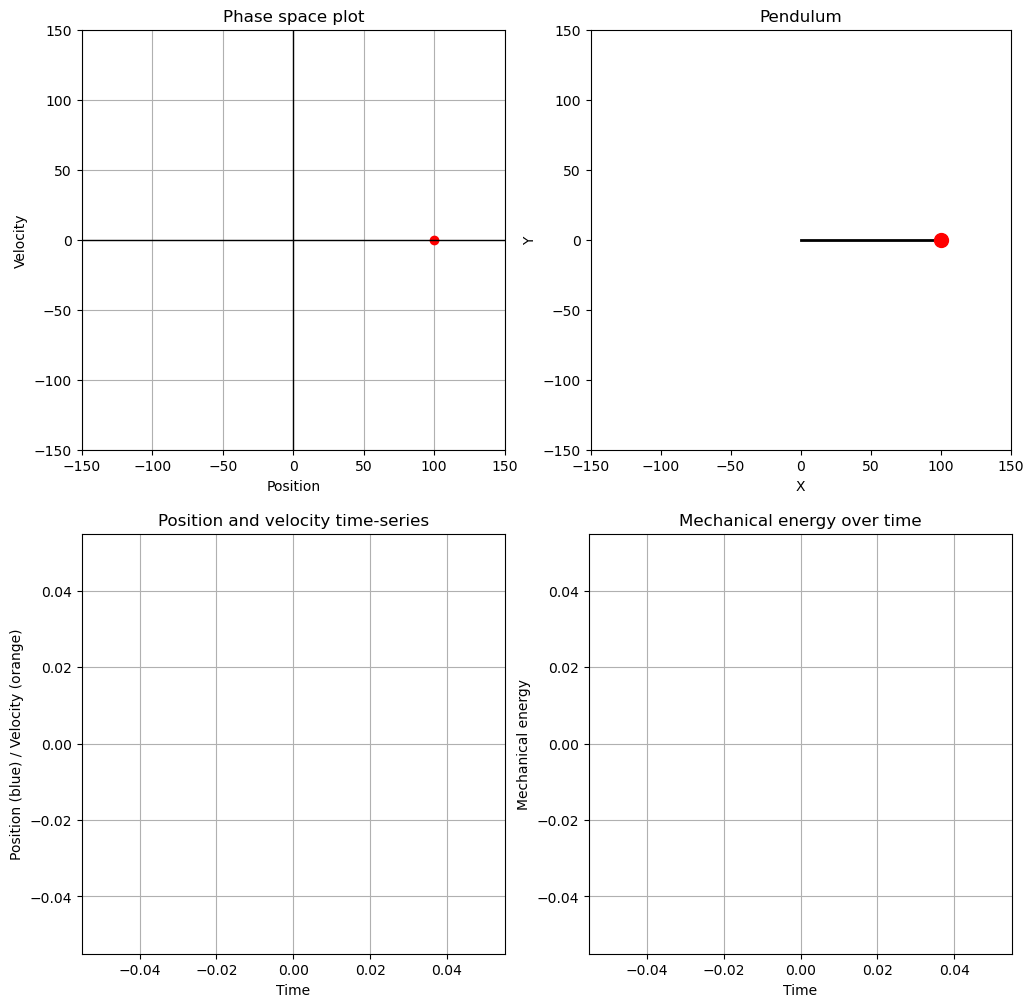

interactive(children=(FloatSlider(value=0.0, description='Time'), FloatSlider(value=0.1, description='Damping'…

<function __main__.plot_phasespace(time_index, damping, initial_position, initial_velocity)>

In [4]:
#Import necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

#Set up initial conditions and parameters for the simulation:
# Simulation parameters
initial_damping = 0.1
initial_conditions = [100, 0]
initial_time = 0
time_step = 0.1
total_duration = 100

#Define the HarmonicOscillator class which simulates the oscillator's motion
class HarmonicOscillator:
    def __init__(self, damping, initial_conditions, initial_time, time_step, total_duration):
        self.damping = damping
        self.initial_conditions = initial_conditions
        self.time = initial_time
        self.time_step = time_step
        self.total_duration = total_duration
        self.position = initial_conditions[0] #attributes
        self.velocity = initial_conditions[1]

    def update(self): #method of class
        self.velocity -= (self.damping * self.velocity + self.position) * self.time_step
        self.position += self.velocity * self.time_step
        self.time += self.time_step

        
#Define the simulate function which runs the simulation for the given initial conditions and parameters 
#It takes the damping, initial position, and initial velocity as inputs and returns the positions, velocities, 
#and times at each time step of the simulation. 
def simulate(damping, initial_position, initial_velocity):
    initial_conditions = [initial_position, initial_velocity]
    oscillator = HarmonicOscillator(damping, initial_conditions, initial_time, time_step, total_duration) # creating the instance oscillator  
    
    #initializing the list with initial state of oscillator
    positions = [oscillator.position] 
    velocities = [oscillator.velocity] 
    times = [oscillator.time]

    while oscillator.time <= oscillator.total_duration:
        oscillator.update() #update method will update the position, velocity and time
        positions.append(oscillator.position) #append the new values to the list
        velocities.append(oscillator.velocity)
        times.append(oscillator.time)

    return positions, velocities, times #returns the list


# Define the mechanical_energy function to calculate the mechanical energy of the oscillator at each time step
def mechanical_energy(positions, velocities):
    k = 1  # Spring constant (assuming a value of 1 for simplicity)
    m = 1  # Mass of the pendulum bob (assuming a value of 1 for simplicity)
    energies = []
    for position, velocity in zip(positions, velocities):
        potential_energy = 0.5 * k * position**2
        kinetic_energy = 0.5 * m * velocity**2
        total_energy = potential_energy + kinetic_energy
        energies.append(total_energy)
    return energies

# Define the plot_phasespace function which creates the phase space plot and pendulum visualization
def plot_phasespace(time_index, damping, initial_position, initial_velocity):
    # generating the data needed for the plots by calling the simulate function
    positions, velocities, times = simulate(damping, initial_position, initial_velocity) 
    energies = mechanical_energy(positions, velocities)  # Calculate the mechanical energy
    
    index = int(time_index // time_step) #calculates the index corresponding to the given time_index in the simulation data

    # Create subplots with 2 rows and 2 columns for a 2x2 grid of visualizations
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

    # Position and velocity time-series plot
    ax3.set_xlabel("Time")
    ax3.set_ylabel("Position (blue) / Velocity (orange)")
    ax3.set_title("Position and velocity time-series")
    ax3.plot(times[:index], positions[:index], 'b-')
    ax3.plot(times[:index], velocities[:index], 'orange')
    ax3.grid(True)

    # Mechanical energy plot
    ax4.set_xlabel("Time")
    ax4.set_ylabel("Mechanical energy")
    ax4.set_title("Mechanical energy over time")
    ax4.plot(times[:index], energies[:index], 'g-')
    ax4.grid(True)
    
    # Phase space plot of the trajectory of the oscillator in position-velocity space up to the current time index
    ax1.set_xlim(-150, 150)
    ax1.set_ylim(-150, 150)
    ax1.set_xlabel("Position")
    ax1.set_ylabel("Velocity")
    ax1.set_title("Phase space plot")
    #This function call plots the positions on the x-axis and the velocities on the y-axis as a blue solid line. 
    #It represents the oscillator's trajectory in the position-velocity space up to the current time index
    ax1.plot(positions[:index], velocities[:index], 'b-')
    ax1.plot(positions[index], velocities[index], 'ro') #for red marker
    
    ax1.grid(True)  # Show gridlines
    # Draw x and y axes
    ax1.axhline(0, color='black', linewidth=1)
    ax1.axvline(0, color='black', linewidth=1)

    # Pendulum plot
    ax2.set_xlim(-150, 150)
    ax2.set_ylim(-150, 150)
    ax2.set_aspect('equal', adjustable='box')
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.set_title("Pendulum")

    # Draw pendulum using the oscillator's position as the x-coordinate and calculating the y-coordinate based on the pendulum length
    pendulum_position = positions[index] #assigns current position of oscillator at given index
    pendulum_length = 100  # You can adjust the pendulum length
    pendulum_y = -np.sqrt(pendulum_length**2 - pendulum_position**2) #This line calculates the y-coordinate of the pendulum bob using the Pythagorean theorem. 
    ax2.plot([0, pendulum_position], [0, pendulum_y], 'k-', linewidth=2)  # drawing Pendulum rod
    ax2.plot(pendulum_position, pendulum_y, 'ro', markersize=10)  # drawing Pendulum bob

    plt.show()

#Create slider widget for controlling the simulation parameters 
damping_slider = FloatSlider(min=0, max=1, step=0.01, value=initial_damping, description='Damping')
initial_position_slider = FloatSlider(min=-150, max=150, step=1, value=initial_conditions[0], description='Initial Position')
initial_velocity_slider = FloatSlider(min=-150, max=150, step=1, value=initial_conditions[1], description='Initial Velocity')
time_slider = FloatSlider(min=0, max=total_duration, step=time_step, value=0, description='Time')

#to create the interactive visualization which updates the plot with the change in slider value
interact(plot_phasespace, time_index=time_slider, damping=damping_slider, initial_position=initial_position_slider, initial_velocity=initial_velocity_slider)
# when slider value change the plot_phasespace function is called with the updated slider value, plots then gets refreshed accordingly

### Note:
I encourage you to explore various scenarios to deepen your understanding of the damped harmonic oscillator and its behavior under different conditions. By experimenting with the interactive sliders for damping, initial position, and initial velocity, you will be able to observe the changes in the phase space plot and pendulum motion. Here are some suggested scenarios to try, along with explanations of their expected outcomes:

- Undamped oscillator (damping = 0):
Set the damping slider to zero, representing an ideal harmonic oscillator without any energy loss. In this case, the phase space plot will be an ellipse, indicating that the system oscillates between the maximum position and velocity. The pendulum visualization will show a constant back-and-forth motion.

- Underdamped oscillator (0 < damping < 1):
Choose a damping value between 0 and 1, such as 0.1. This represents a weak damping scenario where the energy loss is relatively small. The phase space plot will display a spiral, gradually converging towards the origin. The pendulum visualization will show the amplitude of oscillation decreasing over time, eventually coming to rest.

- Critically damped oscillator (damping = 1):
Set the damping slider to 1. In this case, the system will lose energy at the fastest possible rate without oscillating. The phase space plot will show a trajectory moving directly towards the origin. The pendulum visualization will display the system coming to rest quickly without oscillating.

- Overdamped oscillator (damping > 1):
Choose a damping value greater than 1, such as 1.5. This represents a strong damping scenario where the energy loss is significant. The phase space plot will display a trajectory that converges to the origin slowly, without any oscillation. The pendulum visualization will show the system coming to rest very slowly, also without oscillating.

For each of the scenarios, you can also try different initial positions and initial velocities to observe their impact on the system's behavior. Notice how the initial conditions affect the shape and size of the phase space plot and the motion of the pendulum.
